# Sorting Screenshots into Folders Based on Names

In [38]:
import os
import re
import pandas as pd
from collections import Counter
import tqdm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
def getPathAndFilenames(dirname, drive='D:'):
    for entry in os.walk(f"{drive}\\"):
        if dirname in entry[0]:
            path = entry[0]
            files = entry[2]
            return path, files

In [54]:
def clean_file_names(file_list):
    cleaned_files = [file.replace('\u200b', '').replace('\xa0', ' ') for file in files]
    cleaned_files = [re.sub('^\d+?_\s', '', file) for file in cleaned_files]
    cleaned_files = [re.sub('^\(\d+?\)\s', '', file) for file in cleaned_files]
    cleaned_files = [re.sub(' и еще \d+? страниц(\w*?) — Личный_', ' —', file) for file in cleaned_files]
    return cleaned_files

In [4]:
root_path, files = getPathAndFilenames('Captures')

In [5]:
files

['(104) Unlocking the Secret Life of Viruses with Dr. Gary Trubl! (NASA LIVE) - YouTube и еще 45 страниц — Личный_ Microsoft\u200b Edge 27.04.2023 0_22_54.png',
 '(104) Unlocking the Secret Life of Viruses with Dr. Gary Trubl! (NASA LIVE) - YouTube и еще 45 страниц — Личный_ Microsoft\u200b Edge 27.04.2023 0_39_38.png',
 '(110) JPL and the Space Age_ The Footsteps of Voyager - YouTube и еще 19 страниц — Личный_ Microsoft\u200b Edge 10.01.2023 22_58_35.png',
 '(110) JPL and the Space Age_ The Footsteps of Voyager - YouTube и еще 19 страниц — Личный_ Microsoft\u200b Edge 10.01.2023 22_58_37.png',
 '(110) JPL and the Space Age_ The Footsteps of Voyager - YouTube и еще 19 страниц — Личный_ Microsoft\u200b Edge 10.01.2023 23_02_29.png',
 '(110) JPL and the Space Age_ The Footsteps of Voyager - YouTube и еще 19 страниц — Личный_ Microsoft\u200b Edge 10.01.2023 23_02_33.png',
 '(114) ข้อพิรุธพงศาวดารฯ_ กษัตริย์อยุธยาเป็นเครือญาติกับกษัตริย์เขมร - YouTube и еще 19 страниц — Личный_ Microsoft\u

In [6]:
root_path

'D:\\WinDirs\\Video\\Captures'

In [55]:
cleaned_files = clean_file_names(files)
sorted(cleaned_files)

['(Optional) How to Access Databases Using Python _ Coursera — Microsoft Edge 08.06.2023 12_52_35.png',
 '4 ways to do question answering in LangChain _ chat with long PDF docs _ BEST method - YouTube — Microsoft Edge 17.04.2023 12_51_02.png',
 '4 ways to do question answering in LangChain _ chat with long PDF docs _ BEST method - YouTube — Microsoft Edge 17.04.2023 12_52_18.png',
 '4 ways to do question answering in LangChain _ chat with long PDF docs _ BEST method - YouTube — Microsoft Edge 17.04.2023 12_54_48.png',
 '4 ways to do question answering in LangChain _ chat with long PDF docs _ BEST method - YouTube — Microsoft Edge 17.04.2023 12_58_09.png',
 '4 ways to do question answering in LangChain _ chat with long PDF docs _ BEST method - YouTube — Microsoft Edge 17.04.2023 12_59_08.png',
 '4 ways to do question answering in LangChain _ chat with long PDF docs _ BEST method - YouTube — Microsoft Edge 17.04.2023 13_00_24.png',
 'A History of Atlantis Part 1 _ Feature Length Document

In [60]:
[item for item in cleaned_files if '  ' in item]

[]

In [20]:
folders = []
for file_name in cleaned_files:
    prefix = ' '.join(file_name.split(' ')[:-2])
    if prefix not in folders and len(tuple(filter(lambda x: x.startswith(prefix), cleaned_files))) > 1:
        folders.append(prefix)
    
folders

['Unlocking the Secret Life of Viruses with Dr. Gary Trubl! (NASA LIVE) - YouTube — Microsoft Edge',
 'JPL and the Space Age_ The Footsteps of Voyager - YouTube — Microsoft Edge',
 'ข้อพิรุธพงศาวดารฯ_ กษัตริย์อยุธยาเป็นเครือญาติกับกษัตริย์เขมร - YouTube — Microsoft Edge',
 'AbSciCon 2022_ Plenary_ Dr. Aomawa Shields, A Path to Thriving on the Earth & Other Planets - YouTube — Microsoft Edge',
 'Interstellar Travel Without Breaking Physics with Andrew Higgins - YouTube — Microsoft Edge',
 'Разработка консольного приложения - YouTube',
 'อธิบายการขุดอุโมงค์ทะลายกำแพงเมืองกรุงศรีอยุธยา ในสงครามเสียกรุงฯ พ.ศ.๒๓๑๐ - YouTube — Microsoft Edge',
 'เล่าเรื่องแผนการขุดอุโมงค์ถล่มกำแพงเมืองกรุงศรีอยุธยา ของกองทัพอังวะ - YouTube — Microsoft Edge',
 'Программа для шифрования файлов - YouTube',
 'Программа для шифрования файлов - YouTube, group Skillbox — Yandex Browser',
 'Betül Kaçar_ Origin of Life, Ancient DNA, Panspermia, and Aliens _ Lex Fridman Podcast #350 - YouTube — Microsoft Edge',
 'ep.1

In [21]:
len(folders)

66

In [32]:
df = pd.DataFrame({'files': files, 'cleaned_files': cleaned_files})
df

,files,cleaned_files
0,(104) Unlocking the Secret Life of Viruses wit...,Unlocking the Secret Life of Viruses with Dr. ...
1,(104) Unlocking the Secret Life of Viruses wit...,Unlocking the Secret Life of Viruses with Dr. ...
2,(110) JPL and the Space Age_ The Footsteps of ...,JPL and the Space Age_ The Footsteps of Voyage...
3,(110) JPL and the Space Age_ The Footsteps of ...,JPL and the Space Age_ The Footsteps of Voyage...
4,(110) JPL and the Space Age_ The Footsteps of ...,JPL and the Space Age_ The Footsteps of Voyage...
...,...,...
1073,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...
1074,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...
1075,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...
1076,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...,ปราสาทแห่ง _ศรีชัยวัชรปุระ_ ในพระเจ้าชัยวรมัน ...


In [43]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df.cleaned_files)
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 1078, n_features: 1625


In [16]:
X_tfidf.

<1078x1633 sparse matrix of type '<class 'numpy.float64'>'
	with 20371 stored elements in Compressed Sparse Row format>

100%|██████████| 67/67 [01:06<00:00,  1.01it/s]

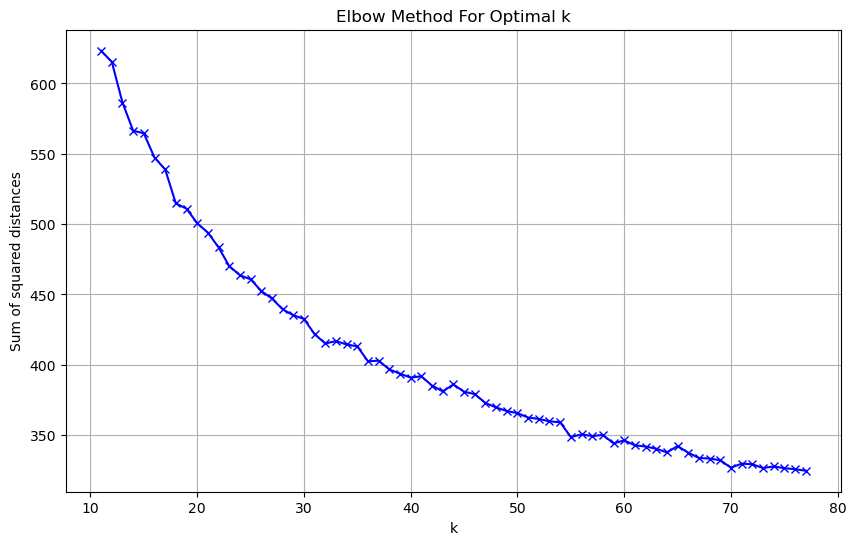

In [35]:
Sum_of_squared_distances = []
K = range(11, 78)
for k in tqdm.tqdm(K):
    km = KMeans(n_clusters=k, max_iter=100, n_init=10)
    km = km.fit(X_tfidf)
    Sum_of_squared_distances.append(km.inertia_)
print()
    
plt.figure(figsize=(10, 6))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [41]:
true_k = 64
for seed in range(5):
    kmeans = KMeans(
        n_clusters=true_k,
        max_iter=100,
        n_init=10,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements asigned to each cluster: {cluster_sizes}")
print()

Number of elements asigned to each cluster: [ 39 136  63  84 151  82  30  33  33  17  20  15   8   5  15  32  20  14
   8  13  10  22  14   9  13  11   3   6  12   3   2  10   7   7   5   4
  17   4   1   6   6   5   1  10   6   5   1  12   1   1   4   2   3   1
   4   2   4   9   4   1   1   1   3   7]
Number of elements asigned to each cluster: [  6 152  63 136  84  15  82  33  32  33   9  13  39  20  30  17  14  16
  17   9   8   7   5  10  20   6  15   6   6  22  12  18   3   8   2  11
   6   3   2   4  10   1  10   1   4   5   2   1   5   4   4   1   4   5
   5   5   1   5   4   1   1   1   3   1]
Number of elements asigned to each cluster: [ 33 135  84  82  38 153  32  63  30  17  33  20  10  15  14   8  13  20
  15  22  15   8  12   6   7   6   3   5   9   3   4   6   5   3   8   7
   6   4  14   3   5  10   1   1   7   1   3   2   2   2   3   2   4   3
  12   4  17   1  15   5   2   3   1   1]
Number of elements asigned to each cluster: [151  84  63  82 136  33  20  30  17  33 

In [53]:
original_space_centroids = vectorizer.inverse_transform(kmeans.cluster_centers_)
original_space_centroids

[array(['02', '03', '11_58_17', '11_58_26', '11_59_55', '12_01_11',
        '12_03_09', '12_06_27', '12_29_26', '12_30_14', '12_30_27',
        '12_31_29', '12_34_12', '12_36_53', '12_37_11', '12_38_44',
        '12_39_38', '12_41_35', '12_43_07', '12_43_29', '12_46_46',
        '12_47_50', '12_53_09', '12_53_37', '12_55_32', '12_57_32',
        '12_57_46', '12_59_04', '13_02_42', '13_02_45', '13_03_21',
        '13_03_23', '13_04_18', '13_08_45', '13_11_43', '13_13_02',
        '13_15_09', '13_16_40', '13_16_50', '13_16_57', '13_17_39',
        '13_17_47', '13_18_58', '13_19_01', '13_19_34', '13_20_21',
        '13_20_24', '13_20_37', '13_20_50', '13_21_47', '13_24_08',
        '13_26_09', '13_27_22', '13_32_31', '13_35_18', '13_36_41',
        '13_37_53', '13_39_26', '13_44_36', '13_45_21', '13_47_49',
        '13_50_34', '13_50_56', '13_50_59', '13_51_21', '13_51_27',
        '13_52_12', '13_53_28', '13_55_05', '13_57_08', '13_58_01',
        '14_01_18', '14_03_00', '14_03_08', '14_

In [49]:
np.argsort?

Signature: np.argsort(a, axis=-1, kind=None, order=None)
Docstring:
Returns the indices that would sort an array.

Perform an indirect sort along the given axis using the algorithm specified
by the `kind` keyword. It returns an array of indices of the same shape as
`a` that index data along the given axis in sorted order.

Parameters
----------
a : array_like
    Array to sort.
axis : int or None, optional
    Axis along which to sort.  The default is -1 (the last axis). If None,
    the flattened array is used.
kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
    Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
    and 'mergesort' use timsort under the covers and, in general, the
    actual implementation will vary with data type. The 'mergesort' option
    is retained for backwards compatibility.

    .. versionchanged:: 1.15.0.
       The 'stable' option was added.
order : str or list of str, optional
    When `a` is an array with fields define

In [45]:
original_space_centroids

[array(['02', '03', '11_58_17', '11_58_26', '11_59_55', '12_01_11',
        '12_03_09', '12_06_27', '12_29_26', '12_30_14', '12_30_27',
        '12_31_29', '12_34_12', '12_36_53', '12_37_11', '12_38_44',
        '12_39_38', '12_41_35', '12_43_07', '12_43_29', '12_46_46',
        '12_47_50', '12_53_09', '12_53_37', '12_55_32', '12_57_32',
        '12_57_46', '12_59_04', '13_02_42', '13_02_45', '13_03_21',
        '13_03_23', '13_04_18', '13_08_45', '13_11_43', '13_13_02',
        '13_15_09', '13_16_40', '13_16_50', '13_16_57', '13_17_39',
        '13_17_47', '13_18_58', '13_19_01', '13_19_34', '13_20_21',
        '13_20_24', '13_20_37', '13_20_50', '13_21_47', '13_24_08',
        '13_26_09', '13_27_22', '13_32_31', '13_35_18', '13_36_41',
        '13_37_53', '13_39_26', '13_44_36', '13_45_21', '13_47_49',
        '13_50_34', '13_50_56', '13_50_59', '13_51_21', '13_51_27',
        '13_52_12', '13_53_28', '13_55_05', '13_57_08', '13_58_01',
        '14_01_18', '14_03_00', '14_03_08', '14_

In [66]:
KMeans?

Init signature:
KMeans(
    n_clusters=8,
    *,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)
Docstring:     
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should ta